<a href="https://colab.research.google.com/github/trilgar/MSM-2021/blob/main/autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision.utils import save_image
import numpy as np

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Завантаження даних

In [19]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)
loader = DeviceDataLoader(loader, device)

## Проектування моделі автоенкодера

In [20]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
			      torch.nn.Linear(18, 9)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
			      torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Tanh()
        )
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded,encoded

## Визначення функції втрат та оптимізатора

In [21]:
# Model Initialization
model = AE()
model.to(device)
  
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
  
# Using an Adam Optimizer with lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-8)

## Навчання

Epoch [1/20], Step [500/1875], Loss: 0.0291
Epoch [1/20], Step [1000/1875], Loss: 0.0334
Epoch [1/20], Step [1500/1875], Loss: 0.0271
Loss for epoch =  0.03094191717207432


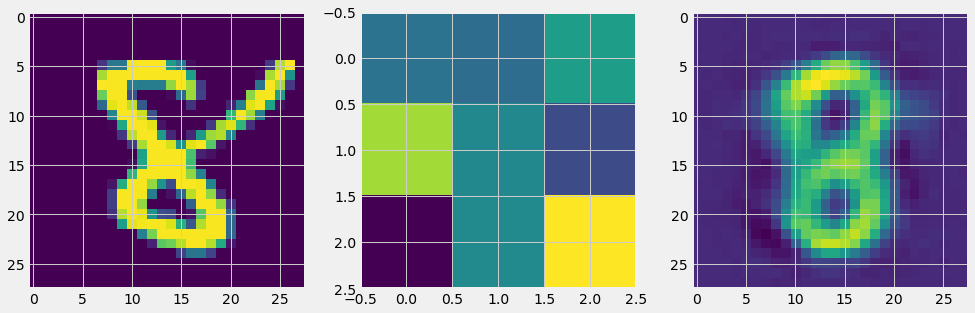

Epoch [2/20], Step [500/1875], Loss: 0.0340
Epoch [2/20], Step [1000/1875], Loss: 0.0298
Epoch [2/20], Step [1500/1875], Loss: 0.0257
Loss for epoch =  0.028784020318587622


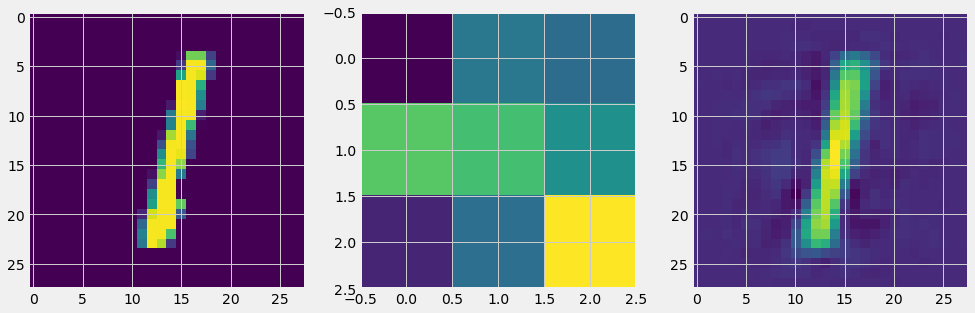

Epoch [3/20], Step [500/1875], Loss: 0.0295
Epoch [3/20], Step [1000/1875], Loss: 0.0257
Epoch [3/20], Step [1500/1875], Loss: 0.0266
Loss for epoch =  0.027682693387071293


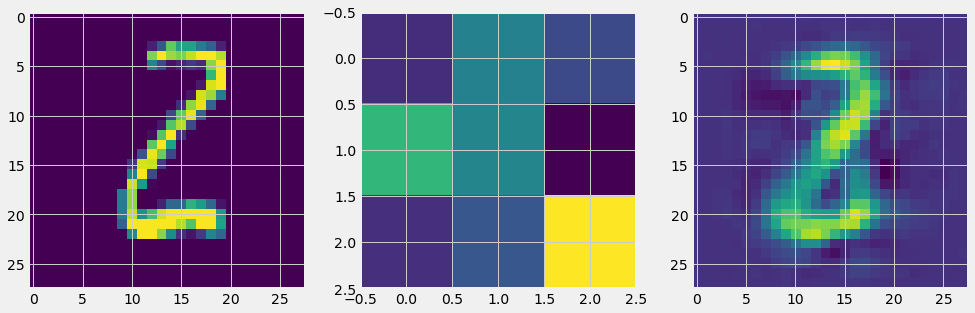

Epoch [4/20], Step [500/1875], Loss: 0.0266
Epoch [4/20], Step [1000/1875], Loss: 0.0266
Epoch [4/20], Step [1500/1875], Loss: 0.0232
Loss for epoch =  0.026698665618896486


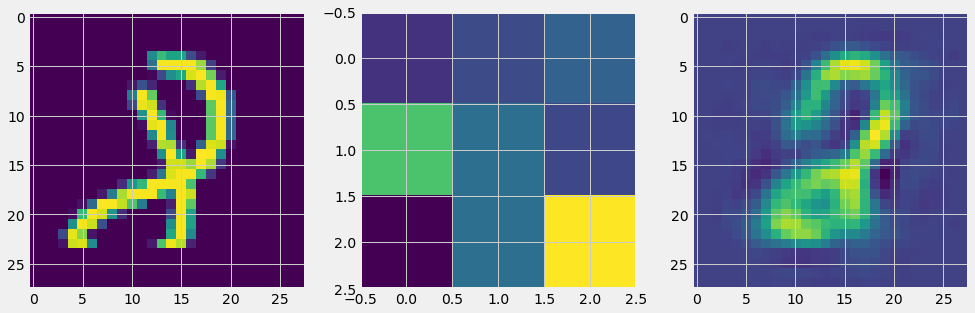

Epoch [5/20], Step [500/1875], Loss: 0.0233
Epoch [5/20], Step [1000/1875], Loss: 0.0247
Epoch [5/20], Step [1500/1875], Loss: 0.0239
Loss for epoch =  0.02595806768834591


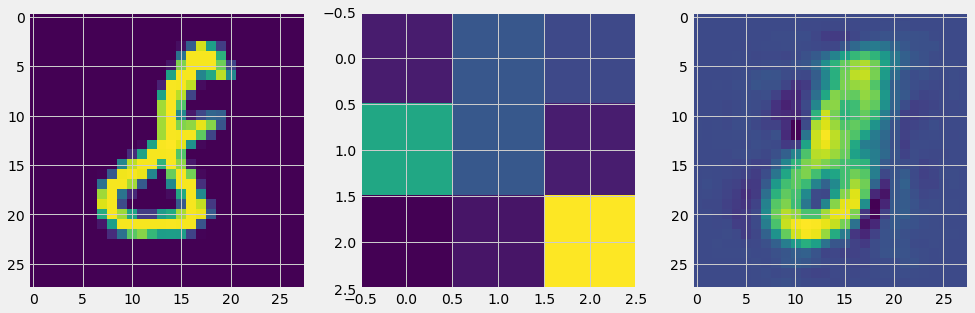

Epoch [6/20], Step [500/1875], Loss: 0.0285
Epoch [6/20], Step [1000/1875], Loss: 0.0281
Epoch [6/20], Step [1500/1875], Loss: 0.0251
Loss for epoch =  0.025444641196727753


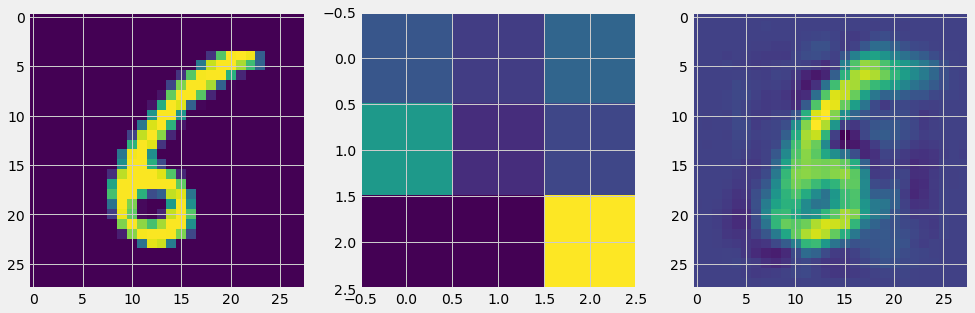

Epoch [7/20], Step [500/1875], Loss: 0.0228
Epoch [7/20], Step [1000/1875], Loss: 0.0281
Epoch [7/20], Step [1500/1875], Loss: 0.0242
Loss for epoch =  0.0250972182850043


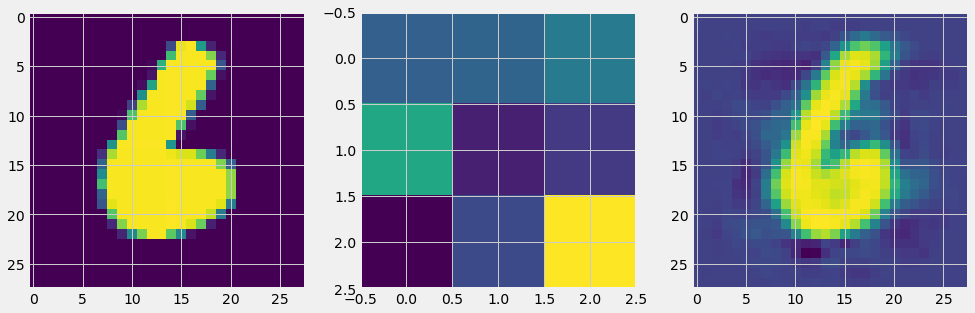

Epoch [8/20], Step [500/1875], Loss: 0.0235
Epoch [8/20], Step [1000/1875], Loss: 0.0230
Epoch [8/20], Step [1500/1875], Loss: 0.0281
Loss for epoch =  0.024788953427473705


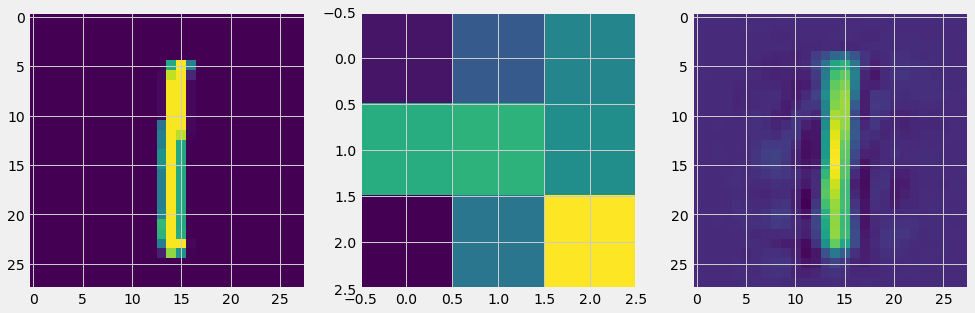

Epoch [9/20], Step [500/1875], Loss: 0.0248
Epoch [9/20], Step [1000/1875], Loss: 0.0311
Epoch [9/20], Step [1500/1875], Loss: 0.0202
Loss for epoch =  0.024556621650854746


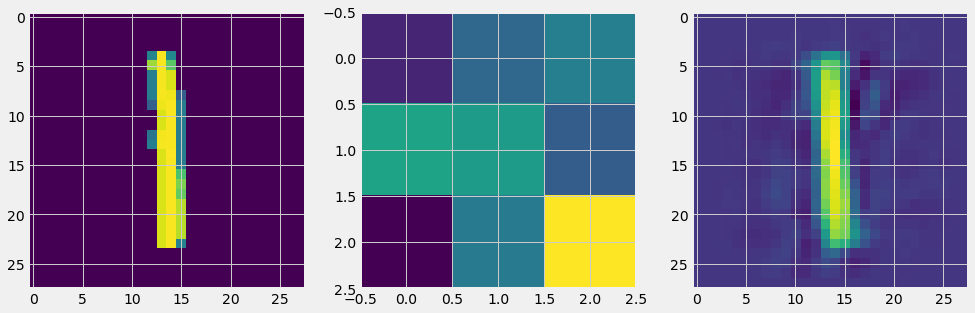

Epoch [10/20], Step [500/1875], Loss: 0.0248
Epoch [10/20], Step [1000/1875], Loss: 0.0238
Epoch [10/20], Step [1500/1875], Loss: 0.0231
Loss for epoch =  0.024352704470356305


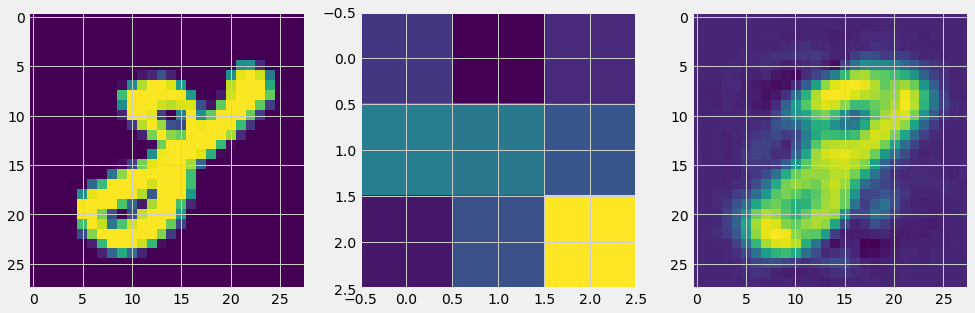

Epoch [11/20], Step [500/1875], Loss: 0.0258
Epoch [11/20], Step [1000/1875], Loss: 0.0230
Epoch [11/20], Step [1500/1875], Loss: 0.0239
Loss for epoch =  0.02418751858274142


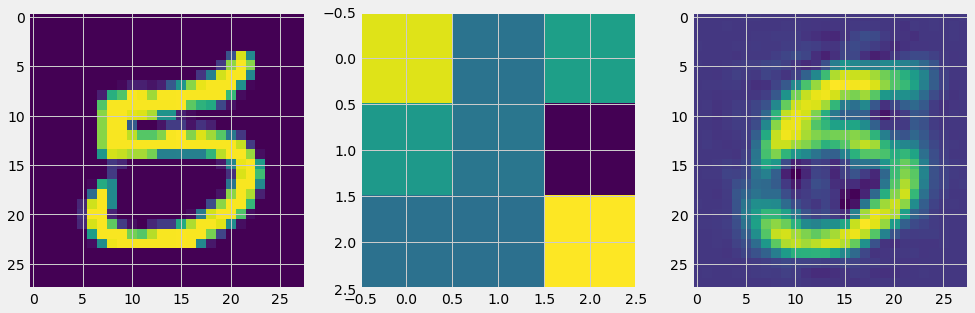

Epoch [12/20], Step [500/1875], Loss: 0.0206
Epoch [12/20], Step [1000/1875], Loss: 0.0255
Epoch [12/20], Step [1500/1875], Loss: 0.0218
Loss for epoch =  0.02402497774362564


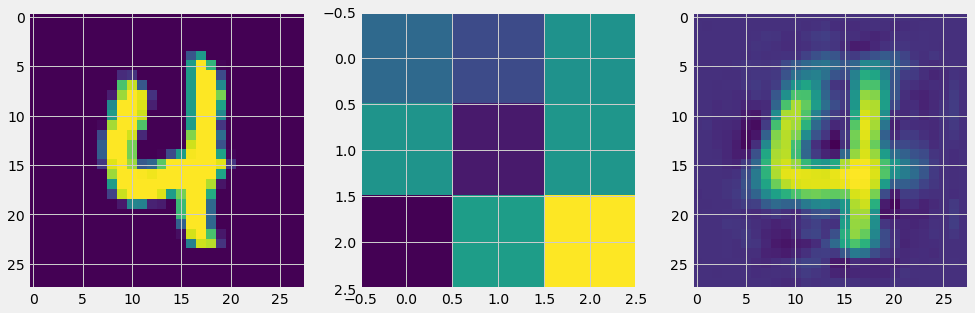

Epoch [13/20], Step [500/1875], Loss: 0.0252
Epoch [13/20], Step [1000/1875], Loss: 0.0229
Epoch [13/20], Step [1500/1875], Loss: 0.0200
Loss for epoch =  0.02389766472975413


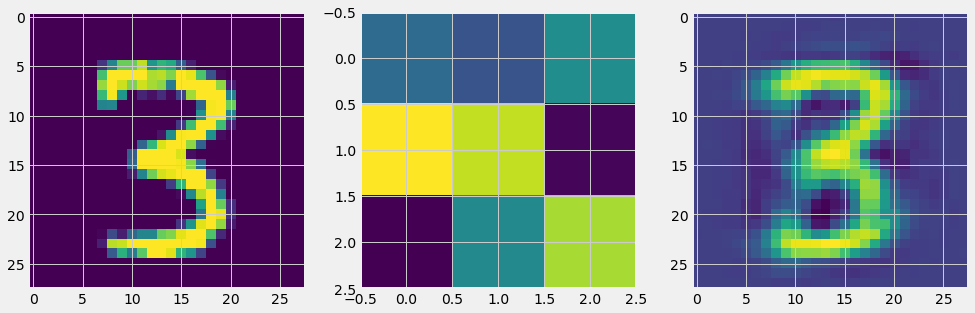

Epoch [14/20], Step [500/1875], Loss: 0.0255
Epoch [14/20], Step [1000/1875], Loss: 0.0246
Epoch [14/20], Step [1500/1875], Loss: 0.0248
Loss for epoch =  0.023782618338863054


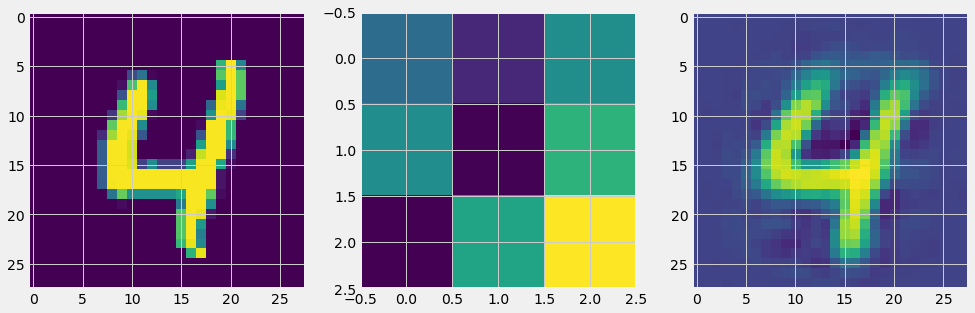

Epoch [15/20], Step [500/1875], Loss: 0.0254
Epoch [15/20], Step [1000/1875], Loss: 0.0246
Epoch [15/20], Step [1500/1875], Loss: 0.0219
Loss for epoch =  0.023647686258951823


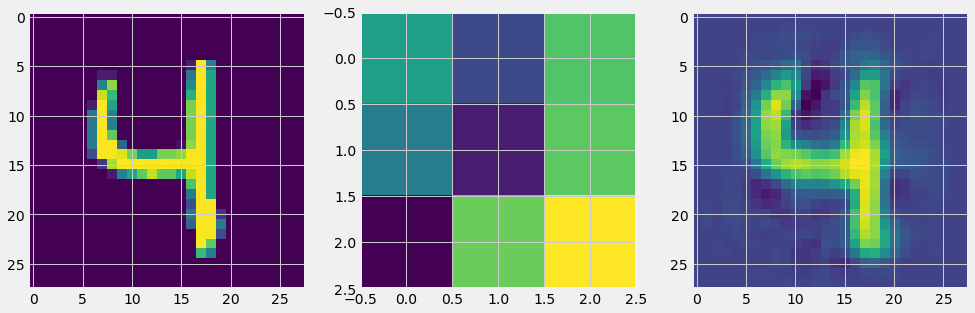

Epoch [16/20], Step [500/1875], Loss: 0.0217
Epoch [16/20], Step [1000/1875], Loss: 0.0227
Epoch [16/20], Step [1500/1875], Loss: 0.0229
Loss for epoch =  0.0235472271780173


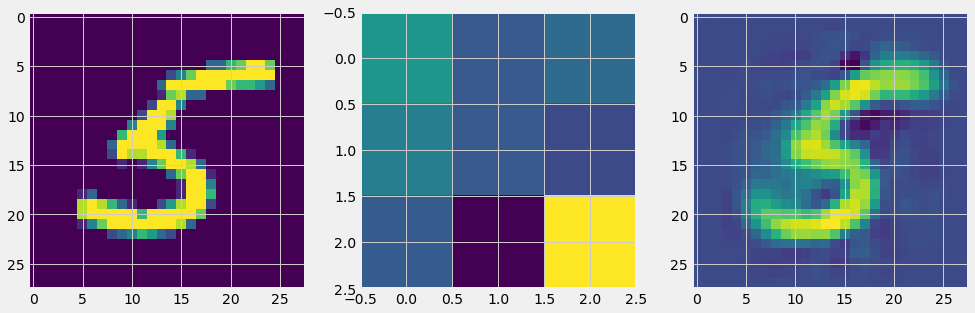

Epoch [17/20], Step [500/1875], Loss: 0.0206
Epoch [17/20], Step [1000/1875], Loss: 0.0251
Epoch [17/20], Step [1500/1875], Loss: 0.0231
Loss for epoch =  0.0234012509872516


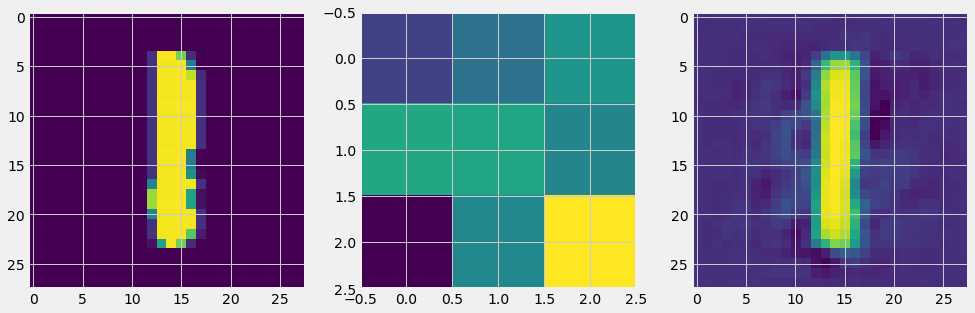

Epoch [18/20], Step [500/1875], Loss: 0.0212
Epoch [18/20], Step [1000/1875], Loss: 0.0202
Epoch [18/20], Step [1500/1875], Loss: 0.0240
Loss for epoch =  0.023197058107455572


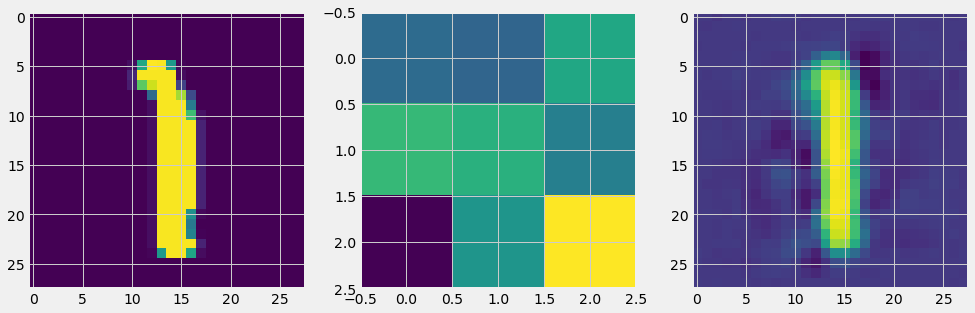

Epoch [19/20], Step [500/1875], Loss: 0.0218
Epoch [19/20], Step [1000/1875], Loss: 0.0246
Epoch [19/20], Step [1500/1875], Loss: 0.0248
Loss for epoch =  0.022985059250394502


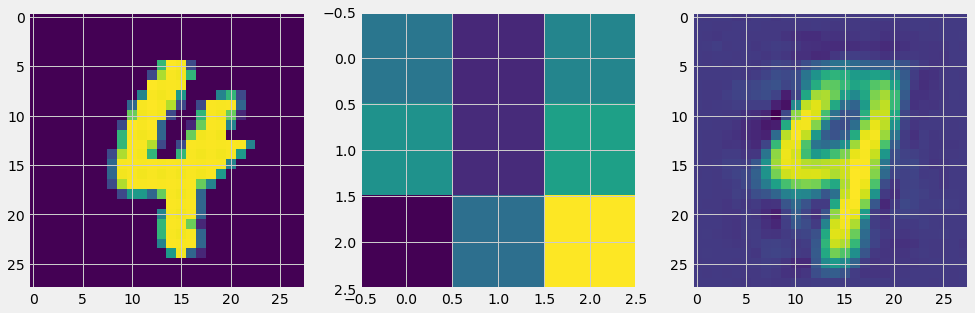

Epoch [20/20], Step [500/1875], Loss: 0.0247
Epoch [20/20], Step [1000/1875], Loss: 0.0211
Epoch [20/20], Step [1500/1875], Loss: 0.0204
Loss for epoch =  0.022804035578171414


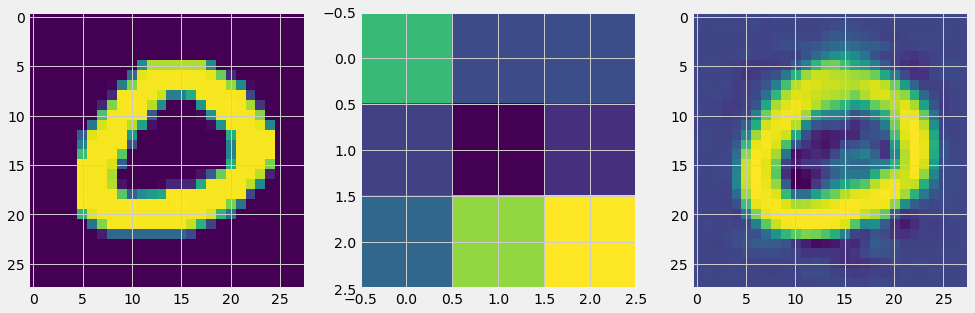

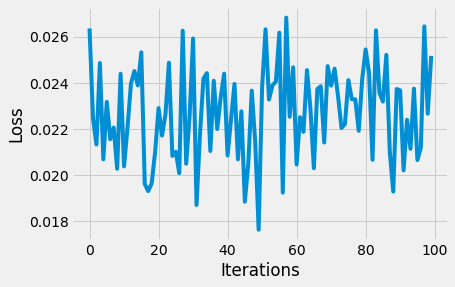

In [24]:
epochs = 20
outputs = []
losses = []
total_step = len(loader)
for epoch in range(epochs):
    mse = []
    for i, (image, _) in enumerate(loader):
        # Reshaping the image to (-1, 784)
        image = image.reshape(-1, 28 * 28)

        # Output of Autoencoder
        reconstructed, encoded = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image)

        # The gradients are set to zero,
        # the the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.item())
        # Storing the losses in a list for plotting
        losses.append(loss)
        if (i + 1) % 500 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, epochs, i + 1, total_step, loss.item()))
    outputs.append((epochs, image, reconstructed))
    fig, (ax1,ax2, ax3) = plt.subplots(ncols = 3, figsize = (15, 8))
    enc = encoded[-1].cpu()
    rec = reconstructed[-1].cpu()
    ax1.imshow(image[-1].reshape(28,28).cpu())
    ax2.imshow(enc.reshape(3,3).detach().numpy())
    ax3.imshow(rec.reshape(28,28).detach().numpy())
    print('Loss for epoch = ', sum(mse)/len(mse))
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

## Збереження моделі

In [29]:
torch.save(model.state_dict(),'perceptron_autoencoder.ckpt')
model.eval()

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=36, bias=True)
    (5): ReLU()
    (6): Linear(in_features=36, out_features=18, bias=True)
    (7): ReLU()
    (8): Linear(in_features=18, out_features=9, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=9, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=36, bias=True)
    (3): ReLU()
    (4): Linear(in_features=36, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=784, bias=True)
    (9): Tanh()
  )
)

## Демонстрація енкодингу та декодингу

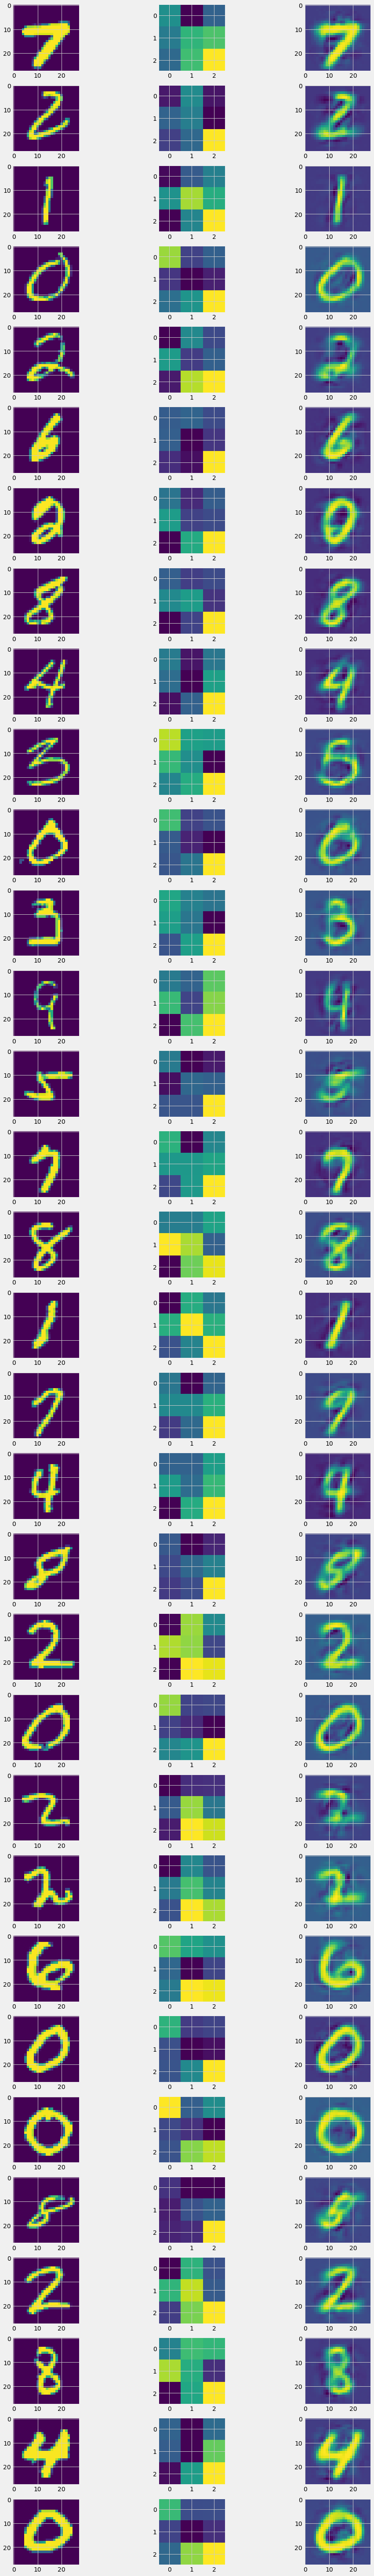

In [28]:
fig, ax = plt.subplots(nrows = len(image), ncols = 3, figsize = (15, 100))
for i, item in enumerate(image):
  item = item.reshape(-1, 28, 28)
  ax[i,0].imshow(item[0].cpu())
  rec, enc = model(item.reshape(-1, 28 * 28))
  ax[i, 1].imshow(enc.reshape(3,3).cpu().detach().numpy())
  ax[i, 2].imshow(rec.reshape(28,28).cpu().detach().numpy())
plt.show()

##  Тестування на власних числах написаних від руки

In [32]:
test_numbers = np.zeros((10, 28 ,28))
for i in range(0, 10):
  image = plt.imread("/content/drive/MyDrive/numbers datasets/"+str(i)+".png")
  test_numbers[i] = image
test_numbers = 1 - test_numbers

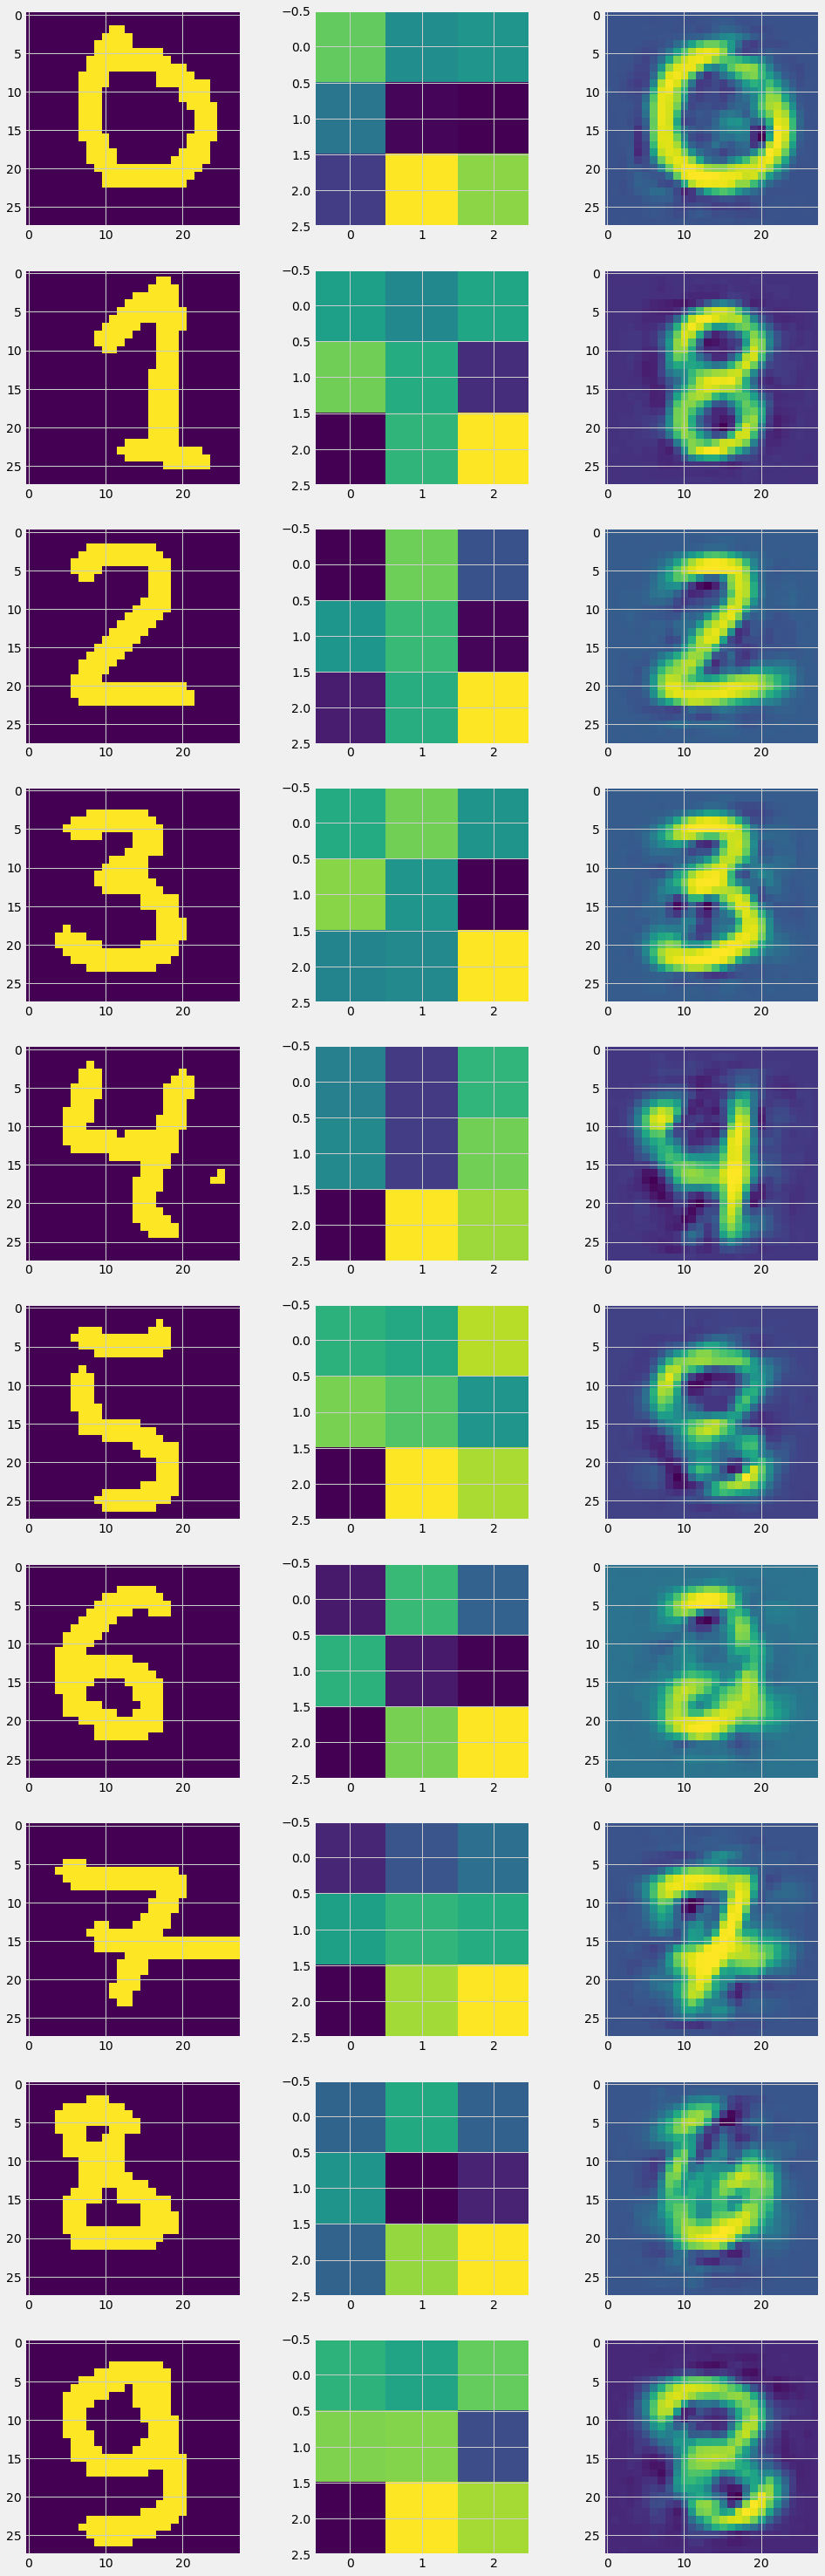

In [46]:
fig, ax = plt.subplots(nrows = len(test_numbers), ncols = 3, figsize = (15, 50))
for i, item in enumerate(test_numbers):
  image = torch.tensor(item)
  ax[i,0].imshow(image)
  rec, enc = model(image.reshape(-1, 28*28).float())
  ax[i, 1].imshow(enc.reshape(3,3).cpu().detach().numpy())
  ax[i, 2].imshow(rec.reshape(28,28).cpu().detach().numpy())
plt.show()